## Brain Tumor Classification with ML & Deep Learning

### Goal

- Automatic detection of brain tumors in MRI images using classical ML algorithms and deep learning models.

### Dataset

- Brain MRI Images for Brain Tumor Detection (Kaggle)
- Binary classification: Tumor / No Tumor
- 300 images per class

### Models

- Logistic Regression
- Random Forest
- SVM
- CNN
- MobileNetV2 (Transfer Learning)

### Results

ModelTest AccuracyLogistic Regression0.85CNN0.87MobileNetV20.92

### Key Findings

CNNs perform similarly to classical ML algorithms on this dataset
Transfer learning shows superior efficiency with limited training data


## Imports

In [20]:
import os
import cv2
import gc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report#
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import layers
import pandas as pd



## Preprocesing

In [12]:
# Activate GPU Memory Growth 
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

# After Training free up memory
gc.collect()
tf.keras.backend.clear_session()

In [3]:
data_dir = "data"
categories = ["no", "yes"]
img_size = 128

X, y = [], []

for label, category in enumerate(categories):
    folder = os.path.join(data_dir, category)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            X.append(img.flatten())  # Image to vector
            y.append(label)

X = np.array(X) 
y = np.array(y)


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (253, 16384)
Shape of y: (253,)


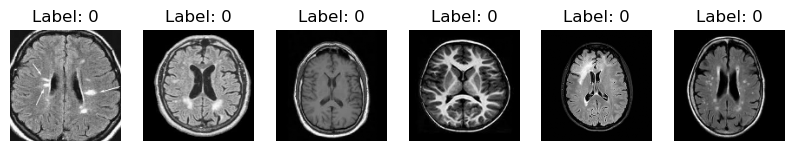

In [4]:
plt.figure(figsize=(10, 3))
for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(X[i].reshape(img_size, img_size), cmap="gray")
    plt.title(f"Label: {y[i]}")
    plt.axis("off")
plt.show()


## Classical ML Algorithms

- Three algorithms applied to flattened image data for binary classification 
- no use of neural networks 

### Logistic Regression 

- Calculates class probabilities using sigmoid function
- Makes binary decisions based on 0.5 threshold

### Random Forest

- Combines predictions from multiple decision trees
- Uses majority voting for final classification

### Support Vector Machine

- Finds hyperplane that maximally separates classes
- Uses kernel functions for non-linear transformations

**These serve as baseline comparison for deep learning approaches (CNN, MobileNetV2). Results evaluated by test accuracy.**


In [5]:
# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Defining all three models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Saving the results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"📊 {name} - Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    results.append((name, acc))



df_results = pd.DataFrame(results, columns=["Model", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)
print(df_results)

📊 Logistic Regression - Accuracy: 0.7969
              precision    recall  f1-score   support

           0       0.75      0.72      0.73        25
           1       0.82      0.85      0.84        39

    accuracy                           0.80        64
   macro avg       0.79      0.78      0.79        64
weighted avg       0.80      0.80      0.80        64

📊 Random Forest - Accuracy: 0.8125
              precision    recall  f1-score   support

           0       0.88      0.60      0.71        25
           1       0.79      0.95      0.86        39

    accuracy                           0.81        64
   macro avg       0.83      0.77      0.79        64
weighted avg       0.82      0.81      0.80        64

📊 SVM - Accuracy: 0.7812
              precision    recall  f1-score   support

           0       0.82      0.56      0.67        25
           1       0.77      0.92      0.84        39

    accuracy                           0.78        64
   macro avg       0.79    

## Binary Classification with Convolutional Neural Networks (CNN)

In [6]:
data_dir = "data"
categories = ["no", "yes"]
img_size = 128

X = []
y = []

for label, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1) / 255.0  # normalisation
y = np.array(y)


### Train/Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


### Defining the model

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/envs/AIA/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-09-16 14:23:52.030801: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-16 14:23:52.030831: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-09-16 14:23:52.030836: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-09-16 14:23:52.030855: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-16 14:23:52.030867: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:2

### Train the model

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size = 4, validation_data=(X_test, y_test))


Epoch 1/10


2025-09-16 14:23:54.726837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6677 - loss: 0.6308 - val_accuracy: 0.7188 - val_loss: 1.0015
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8177 - loss: 0.4714 - val_accuracy: 0.7969 - val_loss: 0.4842
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8206 - loss: 0.3464 - val_accuracy: 0.7812 - val_loss: 0.5823
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9385 - loss: 0.1866 - val_accuracy: 0.7500 - val_loss: 0.7395
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9829 - loss: 0.1040 - val_accuracy: 0.7500 - val_loss: 0.6747
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9333 - loss: 0.1399 - val_accuracy: 0.7969 - val_loss: 0.7127
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9731 - loss: 0.0899 - val_accuracy: 0.8594 - val_loss: 0.6743
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9845 - loss: 0.0525 - val_accuracy: 0.7500 - val_loss: 1.

### Plot Accuracy over Epochs

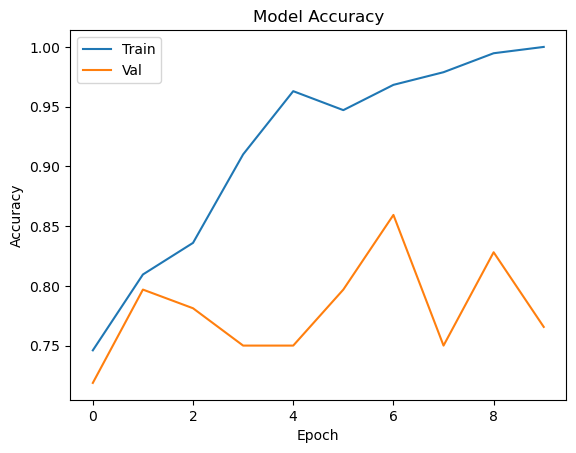

In [13]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7396 - loss: 1.4455 
Test Accuracy: 0.7656


## Train MobileNetV2 (Transfer Learning)

In [15]:
data_dir = "data"
categories = ["no", "yes"]
img_size = 224  # Mobilenet needs 224x224

X, y = [], []

for label, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(label)

X = np.array(X) / 255.0
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)


In [16]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,  
    weights='imagenet'
)
base_model.trainable = False  


In [21]:
model = Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation='sigmoid'))


In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=4,
                    validation_data=(X_test, y_test))


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 89ms/step - accuracy: 0.5001 - loss: 0.9178 - val_accuracy: 0.8750 - val_loss: 0.3123
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7909 - loss: 0.5261 - val_accuracy: 0.9062 - val_loss: 0.2441
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8451 - loss: 0.3380 - val_accuracy: 0.8906 - val_loss: 0.2283
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8468 - loss: 0.3060 - val_accuracy: 0.9062 - val_loss: 0.2196
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9332 - loss: 0.1705 - val_accuracy: 0.9062 - val_loss: 0.2061
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9419 - loss: 0.1496 - val_accuracy: 0.9219 - val_loss: 0.2021
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9581 - loss: 0.1187 - val_accuracy: 0.9375 - val_loss: 0.2134
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9146 - loss: 0.1688 - val_accuracy: 0.9062 - v

### Plot Accuracy over Epoch

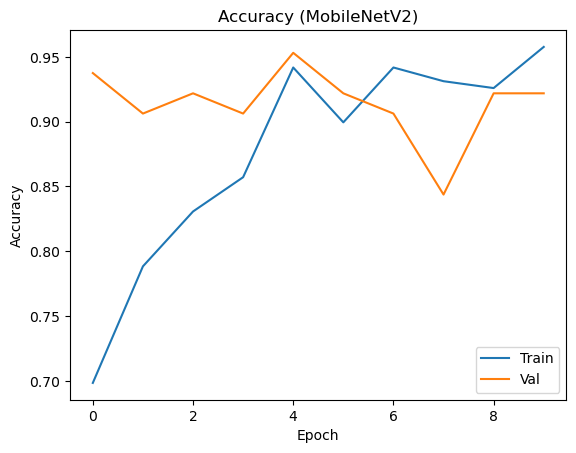

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy (MobileNetV2)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.9271 - loss: 0.2550
Test Accuracy: 0.9219
